In [1]:
from time import time

nb_start_time = time()

# Library Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
from torch import optim, nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader as DL
from torch.nn.utils import weight_norm as WN
import torch.nn.functional as F

#from time import time
import random as r

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, f1_score, precision_recall_fscore_support
from sklearn.impute import SimpleImputer
from sklearn.model_selection import KFold

# Helper Functions

In [3]:
def breaker():
    print("\n" + 30*"-" + "\n")
    
def head(x=None, no_of_ele=5):
    breaker()
    print(x[:no_of_ele])
    breaker()
    
def getCol(x):
    return [col for col in x.columns]

def preprocess(x=None, *args):
    df = x.copy()
    df[args[0]] = df[args[0]].map({'b' : 0, 'c' : 1, 'f' : 2, 'k' : 3, 's' : 4, 'x' : 5})
    df[args[1]] = df[args[1]].map({'f' : 0, 'g' : 1, 's' : 2, 'y' : 3})
    df[args[2]] = df[args[2]].map({'b' : 0, 'c' : 1, 'e' : 2, 'g' : 3, 'n' : 4, 'p' : 5, 
                                   'r' : 6, 'u' : 7, 'w' : 8, 'y' : 9})
    df[args[3]] = df[args[3]].map({'f' : 0, 't' : 1})
    df[args[4]] = df[args[4]].map({'a' : 0, 'c' : 1, 'f' : 2, 'l' : 3, 'm' : 4, 'n' : 5, 
                                   'p' : 6, 's' : 7, 'y' : 8})
    df[args[5]] = df[args[5]].map({'a' : 0, 'f' : 1, 'd' : 2, 'n' : 3})
    df[args[6]] = df[args[6]].map({'c' : 0, 'w' : 1, 'd' : 2})
    df[args[7]] = df[args[7]].map({'b' : 0, 'n' : 1})
    df[args[8]] = df[args[8]].map({'b' : 0, 'e' : 1, 'g' : 2, 'h' : 3, 'k' : 4, 'n' : 5, 
                                   'o' : 6, 'p' : 7, 'r' : 8, 'u' : 9, 'w' : 10, 'y' : 11})
    df[args[9]] = df[args[9]].map({'e' : 0, 't' : 1})
    df[args[10]] = df[args[10]].map({'?' : 0, 'b' : 1, 'c' : 2, 'e' : 3, 'r' : 4, 'z' : 5,
                                     'u' : 6})
    df[args[11]] = df[args[11]].map({'f' : 0, 'k' : 1, 's' : 2, 'y' : 3})
    df[args[12]] = df[args[12]].map({'f' : 0, 'k' : 1, 's' : 2, 'y' : 3})
    df[args[13]] = df[args[13]].map({'b' : 0, 'c' : 1, 'e' : 2, 'g' : 3, 'n' : 4, 'o' : 5, 
                                     'p' : 6, 'w' : 7, 'y' : 8})
    df[args[14]] = df[args[14]].map({'b' : 0, 'c' : 1, 'e' : 2, 'g' : 3, 'n' : 4, 'o' : 5, 
                                     'p' : 6, 'w' : 7, 'y' : 8})
    df[args[15]] = df[args[15]].map({'p' : 0, 'u' : 1})
    df[args[16]] = df[args[16]].map({'n' : 0, 'o' : 1, 'w' : 2, 'y' : 3})
    df[args[17]] = df[args[17]].map({'n' : 0, 'o' : 1, 't' : 2})
    df[args[18]] = df[args[18]].map({'c' : 0, 'e' : 1, 'f' : 2, 'l' : 3, 'n' : 4, 'p' : 5,
                                     's' : 6, 'z' : 7})
    df[args[19]] = df[args[19]].map({'b' : 0, 'h' : 1, 'k' : 2, 'n' : 3, 'o' : 4, 'r' : 5,
                                     'u' : 6, 'w' : 7, 'y' : 8})
    df[args[20]] = df[args[20]].map({'a' : 0, 'c' : 1, 'n' : 2, 's' : 3, 'v' : 4, 'y' : 5})
    df[args[21]] = df[args[21]].map({'d' : 0, 'g' : 1, 'l' : 2, 'm' : 3, 'p' : 4, 'u' : 5, 
                                     'w' : 6})
    df[args[22]] = df[args[22]].map({'e' : 0, 'p' : 1})
    return df

sc_X = StandardScaler()
mms  = MinMaxScaler(feature_range=(0, 1))

# Data Handling

**Inputs**

In [4]:
data = pd.read_csv("../input/mushroom-classification/mushrooms.csv")

breaker()
print("Dataset Shape :", repr(data.shape))
breaker()

for name in getCol(data):
    print(name)
breaker()


------------------------------

Dataset Shape : (8124, 23)

------------------------------

class
cap-shape
cap-surface
cap-color
bruises
odor
gill-attachment
gill-spacing
gill-size
gill-color
stalk-shape
stalk-root
stalk-surface-above-ring
stalk-surface-below-ring
stalk-color-above-ring
stalk-color-below-ring
veil-type
veil-color
ring-number
ring-type
spore-print-color
population
habitat

------------------------------



**Preprocessing**

In [5]:
processed_data = preprocess(data, "cap-shape", "cap-surface", "cap-color",
                            "bruises", "odor",
                            "gill-attachment", "gill-spacing", "gill-size", "gill-color",
                            "stalk-shape", "stalk-root", 
                            "stalk-surface-above-ring", "stalk-surface-below-ring",
                            "stalk-color-above-ring", "stalk-color-below-ring", 
                            "veil-type", "veil-color", "ring-number", "ring-type",
                            "spore-print-color", "population", "habitat", "class")

X = processed_data.iloc[:, 1:].copy().values
y = processed_data.iloc[:, 0].copy().values

#X = sc_X.fit_transform(X)
#X = mms.fit_transform(X)

X = X.astype(float)
y = y.astype(float)

num_features = X.shape[1]

del data, processed_data

**Dataset Template**

In [6]:
class DS(Dataset):
    def __init__(this, X=None, y=None, mode="train"):
        this.mode = mode
        this.X = X
        if mode == "train":
            this.y = y
            
    def __len__(this):
        return this.X.shape[0]
    
    def __getitem__(this, idx):
        if this.mode == "train":
            return torch.FloatTensor(this.X[idx]), torch.FloatTensor(this.y[idx])
        else:
            return torch.FloatTensor(this.X[idx])

# ANN

**Config**

In [7]:
class CFG():
    tr_batch_size = 64
    ts_batch_size = 64
    va_batch_size = 64
    
    epochs  = 50
    n_folds = 5
    
    device = torch.device("cuda:0"  if torch.cuda.is_available() else "cpu")
    
    IL = num_features
    HL_1 = [128]
    HL_2 = [128, 128]
    OL = 1
    
cfg = CFG()

sim_ts_data_setup = DS(X, None, "test")
sim_ts_data = DL(sim_ts_data_setup, batch_size=cfg.ts_batch_size, shuffle=False)

**Setup**

In [8]:
class MLP(nn.Module):
    def __init__(this, IL=None, HL=None, OL=None):
        super(MLP, this).__init__()
        
        this.DP1 = nn.Dropout(p=0.2)
        this.DP2 = nn.Dropout(p=0.5)
        this.HL  = HL
        
        if len(HL) == 1:
            this.BN1 = nn.BatchNorm1d(IL)
            this.FC1 = WN(nn.Linear(IL, HL[0]))
            
            this.BN2 = nn.BatchNorm1d(HL[0])
            this.FC2 = WN(nn.Linear(HL[0], OL))
        
        elif len(HL) == 2:
            this.BN1 = nn.BatchNorm1d(IL)
            this.FC1 = WN(nn.Linear(IL, HL[0]))
            
            this.BN2 = nn.BatchNorm1d(HL[0])
            this.FC2 = WN(nn.Linear(HL[0], HL[1]))
            
            this.BN3 = nn.BatchNorm1d(HL[1])
            this.FC3 = WN(nn.Linear(HL[1], OL))
        
        else:
            raise NotImplementedError("Only Supports Networks of Depth 1 and 2")
            
    def getOptimizer(this, lr=1e-3, wd=0):
        return optim.Adam(this.parameters(), lr=lr, weight_decay=wd)

    def forward(this, x):
        if len(this.HL) == 1:
            x = this.BN1(x)
            #x = this.DP1(x)
            x = F.relu(this.FC1(x))
            x = this.BN2(x)
            #x = this.DP2(x)
            x = torch.sigmoid(this.FC2(x))
            return x
        else:
            x = this.BN1(x)
            #x = this.DP1(x)
            x = F.relu(this.FC1(x))
            x = this.BN2(x)
            #x = this.DP2(x)
            x = F.relu(this.FC2(x))
            x = this.BN3(x)
            #x = this.DP2(x)
            x = torch.sigmoid(this.FC3(x))
            return x

**ANN Helpers**

In [9]:
def train_fn(X=None, y=None, n_folds=None, HL_Used=None):
    breaker()
    print("Training ...")
    breaker()
    
    LP = []
    names = []
    fold = 0
    bestLoss = {"train" : np.inf, "valid" : np.inf}
    
    start_time = time()
    for tr_idx, va_idx in KFold(n_splits=n_folds, shuffle=True, random_state=0).split(X, y):
        print("Processing Fold {fold} ...".format(fold=fold+1))
        
        X_train, X_valid, y_train, y_valid = X[tr_idx], X[va_idx], y[tr_idx], y[va_idx]
        
        tr_data_setup = DS(X_train, y_train.reshape(-1,1))
        va_data_setup = DS(X_valid, y_valid.reshape(-1,1))
        
        DLS = {"train" : DL(tr_data_setup, batch_size=cfg.tr_batch_size, shuffle=True, generator=torch.manual_seed(0)),
               "valid" : DL(va_data_setup, batch_size=cfg.va_batch_size, shuffle=False)
              }
        
        torch.manual_seed(0)
        model = MLP(cfg.IL, HL_Used, cfg.OL)
        model.to(cfg.device)
        
        optimizer = model.getOptimizer()
        scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=4, eps=1e-6, verbose=True)
        
        for e in range(cfg.epochs):
            epochLoss = {"train" : 0, "valid" : 0}
            for phase in ["train", "valid"]:
                if phase == "train":
                    model.train()
                else:
                    model.eval()
                lossPerPass = 0
                
                for feat, label in DLS[phase]:
                    feat, label = feat.to(cfg.device), label.to(cfg.device)
                    
                    optimizer.zero_grad()
                    with torch.set_grad_enabled(phase == "train"):
                        output = model(feat)
                        loss   = nn.BCELoss()(output, label)
                        if phase == "train":
                            loss.backward()
                            optimizer.step()
                    lossPerPass += (loss.item() / label.shape[0])
                epochLoss[phase] = lossPerPass
            LP.append(epochLoss)
            scheduler.step(epochLoss["valid"])
            if epochLoss["valid"] < bestLoss["valid"]:
                bestLoss = epochLoss
                name = "Model_{ids}_Fold_{fold}.pt".format(ids=len(HL_Used), fold=fold)
                names.append(name)
                torch.save(model.state_dict(), name)
        fold += 1
    
    breaker()
    print("Time Taken to Train {f} folds for {e} epochs : {:.2f} seconds".format(time() - start_time, f=n_folds, e=cfg.epochs))
    breaker()
    print("Best Loss :", repr(bestLoss))
    breaker()
    
    return LP, names, model

def eval_fn(model=None, names=None, dataloader=None, num_obs_test=None):
    y_pred = np.zeros((num_obs_test, 1))
    
    for name in names:
        Pred = torch.zeros(cfg.ts_batch_size, 1).to(cfg.device)
        
        model.load_state_dict(torch.load(name))
        model.eval()
        
        for X in dataloader:
            X = X.to(cfg.device)
            with torch.no_grad():
                Prob = model(X)
            Pred = torch.cat((Pred, Prob), dim=0)
        Pred = Pred[cfg.ts_batch_size:].cpu().numpy()
        y_pred = np.add(y_pred, Pred)
    y_pred = np.divide(y_pred, len(names))
    
    y_pred[np.argwhere(y_pred > 0.5)]  = 1
    y_pred[np.argwhere(y_pred <= 0.5)] = 0
    return y_pred


# Config 1 Training and Evalutation


------------------------------

Training ...

------------------------------

Processing Fold 1 ...
Processing Fold 2 ...
Epoch    50: reducing learning rate of group 0 to 1.0000e-04.
Processing Fold 3 ...
Epoch    50: reducing learning rate of group 0 to 1.0000e-04.
Processing Fold 4 ...
Processing Fold 5 ...
Epoch    41: reducing learning rate of group 0 to 1.0000e-04.
Epoch    50: reducing learning rate of group 0 to 1.0000e-05.

------------------------------

Time Taken to Train 5 folds for 50 epochs : 147.06 seconds

------------------------------

Best Loss : {'train': 0.0002373186441397073, 'valid': 9.94173047104141e-06}

------------------------------

Configuration 1 Accuracy : 99.98769 %

------------------------------



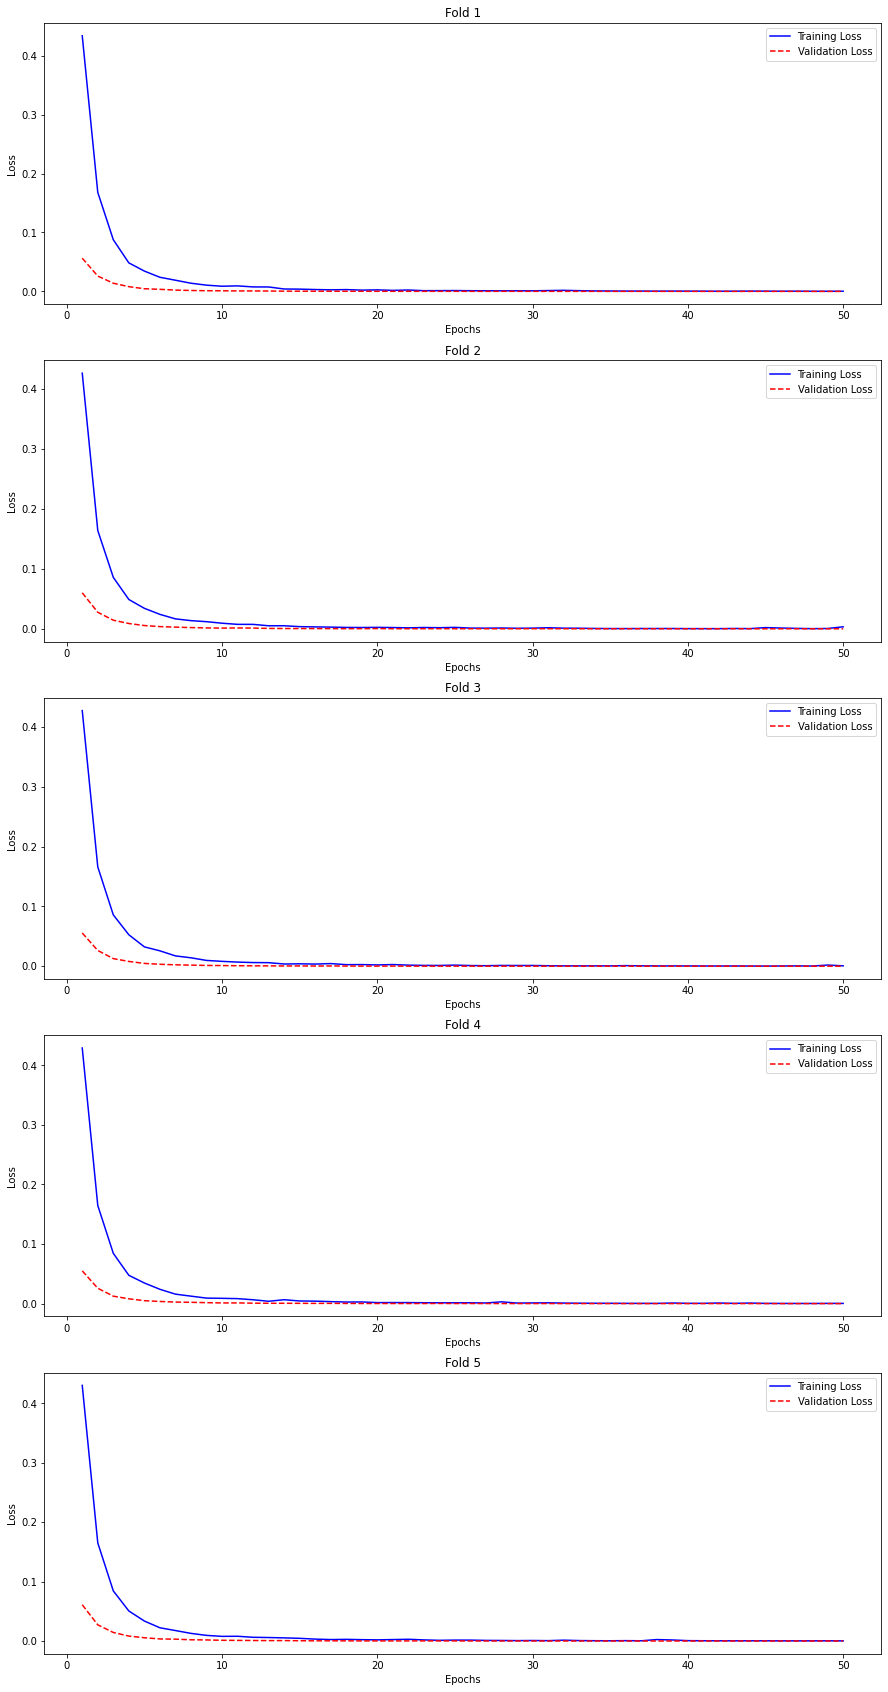

In [10]:
LP, Names, Network = train_fn(X=X, y=y, n_folds=cfg.n_folds, HL_Used=cfg.HL_1)

y_pred = eval_fn(Network, set(Names), sim_ts_data, sim_ts_data_setup.__len__())

print("Configuration 1 Accuracy : {:.5f} %".format(accuracy_score(y, y_pred) * 100))
breaker()

LPV = []
LPT = []
for i in range(len(LP)):
  LPT.append(LP[i]["train"])
  LPV.append(LP[i]["valid"])

xAxis = [i+1 for i in range(cfg.epochs)]
plt.figure(figsize=(15, 30))
for fold in range(cfg.n_folds):
    plt.subplot(cfg.n_folds, 1, fold+1)
    plt.plot(xAxis, LPT[fold*cfg.epochs:(fold+1)*cfg.epochs], "b", label="Training Loss")
    plt.plot(xAxis, LPV[fold*cfg.epochs:(fold+1)*cfg.epochs], "r--", label="Validation Loss")
    plt.legend()
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Fold {fold}".format(fold=fold+1))
plt.show()

In [11]:
breaker()
print("Notebook Rumtime : {:.2f} minutes".format((time() - nb_start_time)/60))
breaker()


------------------------------

Notebook Rumtime : 2.53 minutes

------------------------------

